In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df1 = pd.read_csv('ml_case_training_data.csv')
df2 = pd.read_csv('ml_case_training_hist_data.csv')
df3 = pd.read_csv('ml_case_training_output.csv')

In [3]:
df1.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
df2.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
df3.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(16096, 32)
(193002, 8)
(16096, 2)


In [7]:
# df_ = pd.merge(df1, df2, on='id')
df = pd.merge(df1, df3, on='id')

In [8]:
df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [9]:
df.shape

(16096, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

Columns forecast_cons, forecast_bill_12m, forecast_base_bill_year, forecast_base_bill_ele, date_first_activ, campaign_disc_ele, and activity_new have very few non-null values, thus they will be dropped.

In [11]:
# Dropping columns that have very few non-null values.
df.drop(['forecast_cons', 'forecast_bill_12m', 'forecast_base_bill_year', 'forecast_base_bill_ele', 'date_first_activ', 
              'campaign_disc_ele', 'activity_new'], axis=1, inplace=True)

In [12]:
df.shape

(16096, 26)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   channel_sales             11878 non-null  object 
 2   cons_12m                  16096 non-null  int64  
 3   cons_gas_12m              16096 non-null  int64  
 4   cons_last_month           16096 non-null  int64  
 5   date_activ                16096 non-null  object 
 6   date_end                  16094 non-null  object 
 7   date_modif_prod           15939 non-null  object 
 8   date_renewal              16056 non-null  object 
 9   forecast_cons_12m         16096 non-null  float64
 10  forecast_cons_year        16096 non-null  int64  
 11  forecast_discount_energy  15970 non-null  float64
 12  forecast_meter_rent_12m   16096 non-null  float64
 13  forecast_price_energy_p1  15970 non-null  float64
 14  foreca

We will check if there are any duplicated rows.

In [14]:
df[df.duplicated() == True]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


No rows are duplicated.

The number of null values is small compared to the number of data we have, so we will frop rows with null values.

In [15]:
# Dropping rows with null values
df.dropna(inplace=True)
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0
7,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,c49217f16a06263e5381eaba94a67a8b,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2015-02-09,712.33,713,0.0,145.82,0.120372,0.103487,40.606701,f,71.81,66.00,66.00,1,87.14,3,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
16091,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1


We will check the values in cons_gas_12m column.

In [16]:
df.cons_gas_12m.value_counts() / 137194

0          0.069478
921247     0.000168
867921     0.000168
41532      0.000138
1959386    0.000131
             ...   
411556     0.000007
16299      0.000007
4037       0.000007
2020       0.000007
12266      0.000007
Name: cons_gas_12m, Length: 1583, dtype: float64

In [17]:
df_churn = df[df['churn'] == 1]
df_zero_cons = df_churn[df_churn['cons_gas_12m'] == 0].shape[0] / df_churn.shape[0]
df_zero_cons

0.8586866167913549

The above calculation shows that 85% od people who churn have 0 gas consumption of the past 12 months.

In [18]:
df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7113
lmkebamcaaclubfxadlmueccxoimlema    2038
usilxuppasemubllopkaafesmlibmsdf    1412
ewpakwlliwisiwduibdlfmalxowmwpci     943
sddiedcslfslkckwlfkdpoeeailfpeds      10
epumfxlbckeskwekxbiuasklxalciiuu       4
Name: channel_sales, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11520 entries, 0 to 16094
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11520 non-null  object 
 1   channel_sales             11520 non-null  object 
 2   cons_12m                  11520 non-null  int64  
 3   cons_gas_12m              11520 non-null  int64  
 4   cons_last_month           11520 non-null  int64  
 5   date_activ                11520 non-null  object 
 6   date_end                  11520 non-null  object 
 7   date_modif_prod           11520 non-null  object 
 8   date_renewal              11520 non-null  object 
 9   forecast_cons_12m         11520 non-null  float64
 10  forecast_cons_year        11520 non-null  int64  
 11  forecast_discount_energy  11520 non-null  float64
 12  forecast_meter_rent_12m   11520 non-null  float64
 13  forecast_price_energy_p1  11520 non-null  float64
 14  foreca

In [20]:
df[df.isna() == True].count()

id                          0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
churn                       0
dtype: int64

We will now see the correlations between features.

In [21]:
# See how the features are correlated
df.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.440672,0.926856,0.165464,0.151437,-0.050657,0.090864,-0.050269,0.144121,-0.041720,0.150480,-0.072127,-0.047227,0.318318,0.117016,0.065648,0.109364,-0.054466
cons_gas_12m,0.440672,1.000000,0.418989,0.054279,0.059827,-0.013676,0.046125,-0.037550,0.072812,-0.036768,0.061986,-0.016293,-0.006193,0.277814,0.056149,0.006872,0.055402,-0.041270
cons_last_month,0.926856,0.418989,1.000000,0.126574,0.147763,-0.042550,0.079918,-0.038886,0.119828,-0.031563,0.148808,-0.062472,-0.041428,0.355390,0.088516,0.055256,0.092645,-0.049490
forecast_cons_12m,0.165464,0.054279,0.126574,1.000000,0.762971,0.015344,0.400202,-0.239404,0.244272,0.029635,0.740817,-0.173927,-0.124941,0.015443,0.748164,-0.035103,0.629031,0.015413
forecast_cons_year,0.151437,0.059827,0.147763,0.762971,1.000000,-0.009885,0.340464,-0.216477,0.229376,0.043317,0.980010,-0.131953,-0.094331,0.018620,0.519020,-0.017074,0.489224,0.011773
forecast_discount_energy,-0.050657,-0.013676,-0.042550,0.015344,-0.009885,1.000000,-0.020924,0.341542,0.047251,0.046080,0.010218,0.205761,0.154760,0.051527,0.028288,-0.078813,-0.021189,0.013628
forecast_meter_rent_12m,0.090864,0.046125,0.079918,0.400202,0.340464,-0.020924,1.000000,-0.611800,0.670447,-0.192784,0.304244,0.033990,0.047639,-0.012291,0.341294,-0.018376,0.619608,0.043569
forecast_price_energy_p1,-0.050269,-0.037550,-0.038886,-0.239404,-0.216477,0.341542,-0.611800,1.000000,-0.417947,0.437707,-0.179094,0.200525,0.010534,0.017240,-0.176826,-0.046347,-0.380166,-0.016624
forecast_price_energy_p2,0.144121,0.072812,0.119828,0.244272,0.229376,0.047251,0.670447,-0.417947,1.000000,-0.333734,0.211954,0.088159,0.096329,0.026163,0.244107,0.020317,0.360548,0.029638
forecast_price_pow_p1,-0.041720,-0.036768,-0.031563,0.029635,0.043317,0.046080,-0.192784,0.437707,-0.333734,1.000000,0.032967,-0.031702,-0.083903,-0.015035,-0.015905,-0.023302,-0.015028,-0.003669


We notice from the above correlation matrix that there are some features with high correlations. So, we will remove features with correlations above 90%. We will also drop the date columns.

In [22]:
# Dropping highly correlated columns
df.drop(['cons_12m', 'forecast_cons_year','date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1, inplace=True)

In [23]:
# Checking the correlations once more
df.corr()

,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_gas_12m,1.000000,0.418989,0.054279,-0.013676,0.046125,-0.037550,0.072812,-0.036768,0.061986,-0.016293,-0.006193,0.277814,0.056149,0.006872,0.055402,-0.041270
cons_last_month,0.418989,1.000000,0.126574,-0.042550,0.079918,-0.038886,0.119828,-0.031563,0.148808,-0.062472,-0.041428,0.355390,0.088516,0.055256,0.092645,-0.049490
forecast_cons_12m,0.054279,0.126574,1.000000,0.015344,0.400202,-0.239404,0.244272,0.029635,0.740817,-0.173927,-0.124941,0.015443,0.748164,-0.035103,0.629031,0.015413
forecast_discount_energy,-0.013676,-0.042550,0.015344,1.000000,-0.020924,0.341542,0.047251,0.046080,0.010218,0.205761,0.154760,0.051527,0.028288,-0.078813,-0.021189,0.013628
forecast_meter_rent_12m,0.046125,0.079918,0.400202,-0.020924,1.000000,-0.611800,0.670447,-0.192784,0.304244,0.033990,0.047639,-0.012291,0.341294,-0.018376,0.619608,0.043569
forecast_price_energy_p1,-0.037550,-0.038886,-0.239404,0.341542,-0.611800,1.000000,-0.417947,0.437707,-0.179094,0.200525,0.010534,0.017240,-0.176826,-0.046347,-0.380166,-0.016624
forecast_price_energy_p2,0.072812,0.119828,0.244272,0.047251,0.670447,-0.417947,1.000000,-0.333734,0.211954,0.088159,0.096329,0.026163,0.244107,0.020317,0.360548,0.029638
forecast_price_pow_p1,-0.036768,-0.031563,0.029635,0.046080,-0.192784,0.437707,-0.333734,1.000000,0.032967,-0.031702,-0.083903,-0.015035,-0.015905,-0.023302,-0.015028,-0.003669
imp_cons,0.061986,0.148808,0.740817,0.010218,0.304244,-0.179094,0.211954,0.032967,1.000000,-0.116481,-0.081794,0.023433,0.520981,-0.021673,0.449289,0.011387
margin_gross_pow_ele,-0.016293,-0.062472,-0.173927,0.205761,0.033990,0.200525,0.088159,-0.031702,-0.116481,1.000000,0.730301,-0.046423,-0.079458,-0.033774,0.046753,0.084871


In [24]:
percent = df.churn.value_counts() / df.shape[0] * 100
labels = ['No', 'Yes']

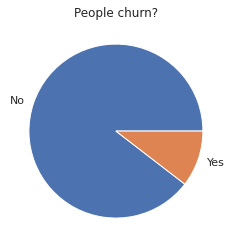

In [25]:
plt.pie(percent, labels=labels);
plt.title('People churn?');

Most people do not churn according to this pie chart.

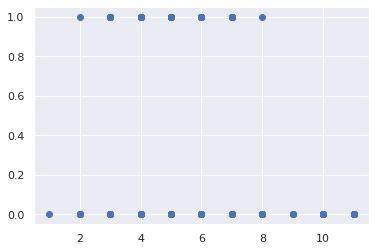

In [26]:
plt.scatter(df.num_years_antig, df.churn);

People who spend more than 8 years do not churn.

We will map the values of has_gas to 0 and 1 to become more clear.

In [27]:
df.has_gas = df.has_gas.map({'t' : '1', 'f' : '0'})

In [28]:
df.has_gas.value_counts()

0    9495
1    2025
Name: has_gas, dtype: int64

Now, we will change the type to int.

In [29]:
df.has_gas = df.has_gas.astype('int32')

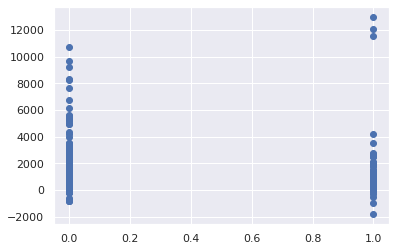

In [30]:
plt.scatter(df.churn, df.imp_cons);

We notice here that people who have currently paid consuptions between 4000 and 11000 do not churn.

# Feature Engineering

According to the correlation matrix, features num_years_antig, margin_gross_pow_ele, and margin_net_pow_ele seem to have the highest correlations with the output.

In [31]:
df.has_gas = df.has_gas.astype('int32')

## One-Hot Encoding

We have a few object features that have to be encoded.

In [32]:
df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7113
lmkebamcaaclubfxadlmueccxoimlema    2038
usilxuppasemubllopkaafesmlibmsdf    1412
ewpakwlliwisiwduibdlfmalxowmwpci     943
sddiedcslfslkckwlfkdpoeeailfpeds      10
epumfxlbckeskwekxbiuasklxalciiuu       4
Name: channel_sales, dtype: int64

In [33]:
df[['epu', 'ewp', 'foo', 'lmk', 'sdd', 'usi']] = pd.get_dummies(df.channel_sales)
df.drop('channel_sales', axis=1, inplace=True)

In [34]:
df.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    6879
kamkkxfxxuwbdslkwifmmcsiusiuosws    2857
ldkssxwpmemidmecebumciepifcamkci    1783
usapbepcfoloekilkwsdiboslwaxobdp       1
Name: origin_up, dtype: int64

In [35]:
df[['kam', 'ldk', 'lxi', 'usa']] = pd.get_dummies(df.origin_up)
df.drop('origin_up', axis=1, inplace=True)

In [36]:
df.drop('id', axis=1, inplace=True)

# Modeling and Evaluation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [38]:
y = np.array(df.churn)
x = np.array(df.drop('churn', axis=1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
model = svm.SVC(C=2, degree=3, kernel='poly')
trained_model = model.fit(x_train, y_train)

In [60]:
trained_model

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
trained_model.score(x_test, y_test)

0.8901909722222222

As we see here, a better model should be used since svm only provided us with 89% test accuracy.